### Football Player's Performance Prediction 

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [113]:
df = pd.read_csv('C://Users//Shani//Desktop//project_data.csv', encoding='latin1')  
df.head()

,S.No,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,HeadingAccuracy,ShortPassing,Volleys,LongPassing,BallControl,Acceleration,ShotPower,Jumping,Stamina,Penalties
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,70,90,86,87,96,91,85,68,72,75
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,89,81,87,77,94,89,95,95,88,85
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,62,84,84,78,95,94,80,61,81,81
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,21,50,13,51,42,57,31,67,43,40
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,55,92,82,91,91,78,91,63,90,79


### Data Preprocessing

In [114]:
# Drop non-numeric and irrelevant columns
df.drop(columns=["Name",'S.No','Photo','Flag', 'ID','Body Type', 'Nationality', 'Club', 'Preferred Foot', 'Position', 'Jersey Number', 'Joined', 'Contract Valid Until'], inplace=True)


In [115]:
df.head()

,Age,Overall,Potential,Height,Weight,HeadingAccuracy,ShortPassing,Volleys,LongPassing,BallControl,Acceleration,ShotPower,Jumping,Stamina,Penalties
0,31,94,94,5'7,159lbs,70,90,86,87,96,91,85,68,72,75
1,33,94,94,6'2,183lbs,89,81,87,77,94,89,95,95,88,85
2,26,92,93,5'9,150lbs,62,84,84,78,95,94,80,61,81,81
3,27,91,93,6'4,168lbs,21,50,13,51,42,57,31,67,43,40
4,27,91,92,5'11,154lbs,55,92,82,91,91,78,91,63,90,79


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              4999 non-null   int64 
 1   Overall          4999 non-null   int64 
 2   Potential        4999 non-null   int64 
 3   Height           4999 non-null   object
 4   Weight           4999 non-null   object
 5   HeadingAccuracy  4999 non-null   int64 
 6   ShortPassing     4999 non-null   int64 
 7   Volleys          4999 non-null   int64 
 8   LongPassing      4999 non-null   int64 
 9   BallControl      4999 non-null   int64 
 10  Acceleration     4999 non-null   int64 
 11  ShotPower        4999 non-null   int64 
 12  Jumping          4999 non-null   int64 
 13  Stamina          4999 non-null   int64 
 14  Penalties        4999 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 585.9+ KB


In [117]:
df["Height"] = df["Height"].str.replace("'","").astype(float)

In [118]:
df["Weight"]=df["Weight"].str.replace("lbs","").astype(float)

In [119]:
df.columns

Index(['Age', 'Overall', 'Potential', 'Height', 'Weight', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'LongPassing', 'BallControl', 'Acceleration',
       'ShotPower', 'Jumping', 'Stamina', 'Penalties'],
      dtype='object')

In [120]:
import numpy as np
# Create a new column 'Overall_binary' with 1 for values > 50 and 0 for values <= 50
df['Overall_binary'] = np.where(df['Overall'] > 85, 1, 0)

In [121]:
df.drop(columns=["Overall"],inplace=True)

In [122]:
df['Overall_binary'].nunique()

2

<Axes: xlabel='Overall_binary'>

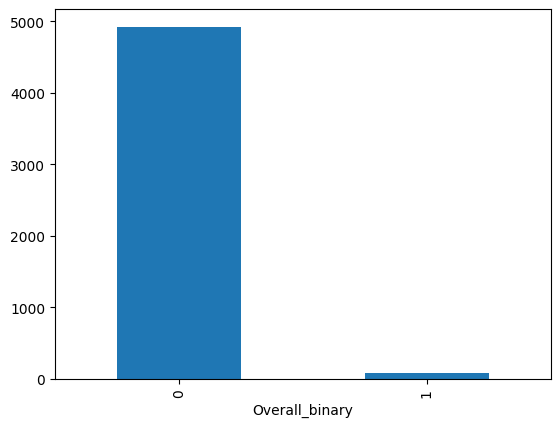

In [123]:
df['Overall_binary'].value_counts().plot(kind="bar")

### Algorithms

### Support Vector Machine 

In [124]:
# Define features and target variable
X = df.drop('Overall_binary', axis=1)  # Features
y = df['Overall_binary']  # Target variable

In [125]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


<Axes: xlabel='Overall_binary'>

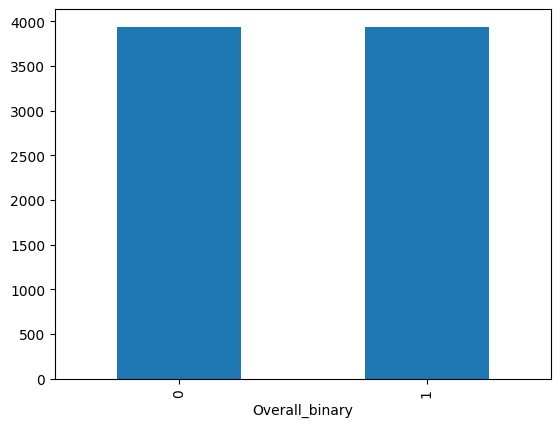

In [129]:
y_train_resampled.value_counts().plot(kind="bar")

In [74]:
# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [130]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can use different kernels like 'rbf' if needed
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear', random_state=42)

In [131]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [146]:
# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Classification Report:\n", classification_report(y_test, y_pred))

SVM Accuracy: 0.98
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       983
           1       0.46      1.00      0.63        17

    accuracy                           0.98      1000
   macro avg       0.73      0.99      0.81      1000
weighted avg       0.99      0.98      0.98      1000



### Navie Bayes

In [134]:
# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [135]:
# Make predictions
y_pred_nb = nb_model.predict(X_test)

In [145]:
# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.956
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       983
           1       0.28      1.00      0.44        17

    accuracy                           0.96      1000
   macro avg       0.64      0.98      0.71      1000
weighted avg       0.99      0.96      0.97      1000



### Decision Tree

In [138]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [139]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [144]:
# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.99
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       983
           1       0.64      0.94      0.76        17

    accuracy                           0.99      1000
   macro avg       0.82      0.97      0.88      1000
weighted avg       0.99      0.99      0.99      1000

